In [3]:
import numpy as np
import sys
sys.path.append('../python')

from Generators import SwissGenerator

generator=SwissGenerator(min_theta=1,max_theta=10)
X,theta=generator.Sample(n=1000)


In [4]:
%matplotlib notebook
from matplotlib import collections  as mc
from matplotlib import cm
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(X[:,0],X[:,1],X[:,2],c=theta ,cmap=cm.viridis,vmin=np.min(theta),vmax=np.max(theta))

plt.show()

<IPython.core.display.Javascript object>

ValueError: Unknown projection '3d'

### Older code

In [ ]:
x.T.shape, y.shape, X[:,1].shape

In [ ]:
a=np.array([0,1,2])
np.stack((a,a))

In [ ]:
XYZ=np.stack((x,y,X[:,1]),axis=1)
XYZ.shape

In [ ]:
segments,pairs=Compute_edges(XYZ,max_dist=0.04)

In [ ]:
len(segments),segments[:3]

In [ ]:
len(pairs[0]),pairs[0][:10],pairs[1][:10]

<IPython.core.display.Javascript object>


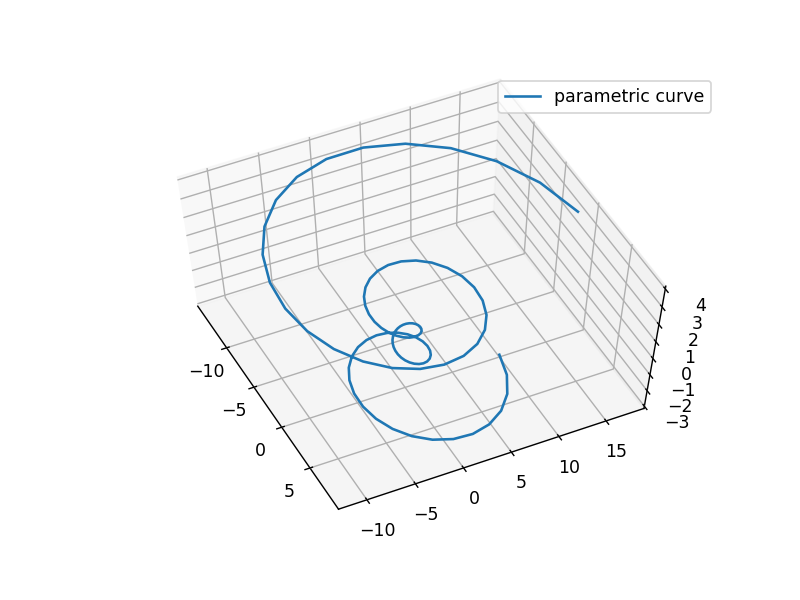

In [11]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-3, 4, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()


In [ ]:
plot_graph(X,segments)

In [ ]:
%matplotlib notebook

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)